In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

https://stackoverflow.com/questions/35273741/how-to-fit-a-line-through-a-3d-pointcloud

In [2]:
tMax = 10  # s
f = 20     # hz
v = 2      # m/s

samples = tMax * f

t = np.linspace(0, tMax, samples)
div = 0.2

x = 1 * np.sin(t) + t + np.random.uniform(-div,div,samples)
y = 1 * np.cos(t) + t + np.random.uniform(-div,div,samples)
z = 1 * np.sin(t) * np.cos(t) + t +np.random.uniform(-div,div,samples)

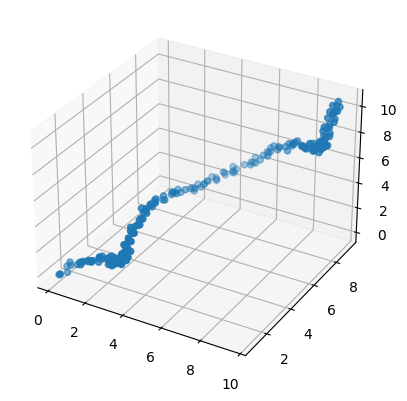

In [3]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(x, y, z)

In [4]:
X = np.vstack([x, y]).T

In [5]:
kernel = 1 * RBF()
regressor = GaussianProcessRegressor(kernel=kernel, alpha=0.2**2, random_state=0)

In [6]:
regressor.fit(X, z)

GaussianProcessRegressor(alpha=0.04000000000000001,
                         kernel=1**2 * RBF(length_scale=1), random_state=0)

In [7]:
regressor.score(X, z)

0.9955489569214673

In [8]:
zhat = regressor.predict(X)

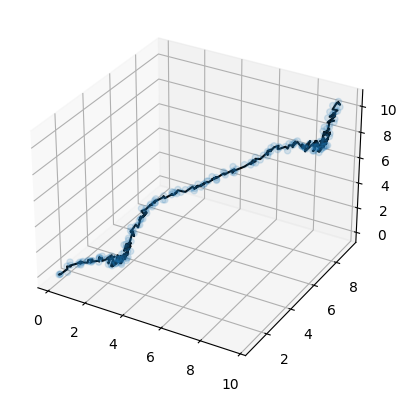

In [9]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(x, y, z, alpha=0.15)
axe.plot(x, y, zhat, color="black")

In [10]:
from pykalman import KalmanFilter

kf = KalmanFilter(
    transition_matrices = [[1, 0, 0], [0, 1, 0], [0, 0, 1]],
    observation_matrices = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
)
#measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
#kf = kf.em(measurements, n_iter=5)
#(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
#(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [11]:
X = np.vstack([x, y, z]).T

In [12]:
kf = kf.em(X, n_iter=10)
(Xs, s) = kf.smooth(X)

In [17]:
np.mean((Xs - X) / X * 100., axis=0)

array([ 0.31153106,  0.10122965, -3.27593493])

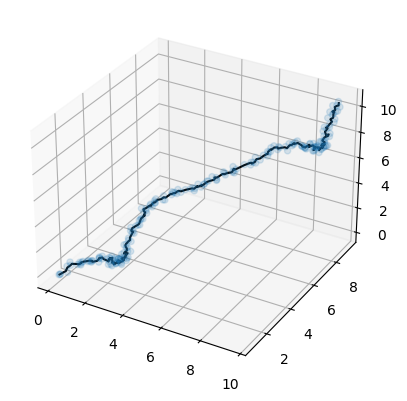

In [13]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(x, y, z, alpha=0.15)
axe.plot(*Xs.T, color="black")